# SWAHILI AUTO-CORRECT NLP APPLICATION

In [122]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('swadesh')
import nltk
nltk.download('stopwords')
from nltk import FreqDist
from nltk.corpus import swadesh
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

[nltk_data] Downloading package swadesh to C:\Users\Immanuel
[nltk_data]     Ruraya\AppData\Roaming\nltk_data...
[nltk_data]   Package swadesh is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Immanuel
[nltk_data]     Ruraya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# function to scrape Swahili text 

In [92]:
# function to scrape Swahili text from a website

def scrape_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = ""
    for p in soup.find_all('p'):
        text += p.text.strip() + "\n"
    return text

# Collection of large corpus of Swahili text by scraping

In [93]:
# Collection of large corpus of Swahili text by scraping multiple websites

def collect_corpus(urls):
    corpus = ""
    for url in urls:
        text = scrape_website(url)
        corpus += text
    return corpus

In [102]:
# URLs to scrape Swahili text from
urls = ['https://www.bbc.com/swahili', 'https://sw.wikipedia.org/wiki/Mwanzo', 'https://www.standardmedia.co.ke/topic/swahili']

# Collecting large corpus of Swahili text by scraping the websites
corpus = collect_corpus(urls)

# Saveing the corpus to a file
with open('Swahili_corpus_1.csv', 'w', encoding='utf-8') as f:
    f.write(corpus)

# Cleaning and preprocessing the text data

In [103]:
# Cleaning and preprocessing the text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    return words

In [104]:
# Cleaning and Preprocessing the corpus
corpus_words = clean_text(corpus)

# Print the first 150 words in the preprocessed corpus (can bem more)
print(corpus_words[:500])

['balozi', 'wa', 'jamuhuri', 'ya', 'kidemokrasi', 'ya', 'congo', 'katika', 'umoja', 'wa', 'mataifa', 'amesema', 'kuwa', 'serikali', 'ya', 'nchi', 'yake', 'haiwezi', 'kufanya', 'mazungumzo', 'na', 'kikundi', 'cha', 'waasi', 'wa', 'm23', 'fikiria', 'wewe', 'ni', 'mtu', 'wa', 'kipato', 'cha', 'chini', 'ambaye', 'umepewa', 'kazi', 'ya', 'siku', 'kama', 'ziada', 'katika', 'filamu', 'ya', 'bollywood', 'jukumu', 'lako', 'ni', 'kwenda', 'kwenye', 'atm', 'na', 'utoe', 'pesa', 'stargazers', 'in', 'australia', 'and', 'parts', 'of', 'southeast', 'asia', 'will', 'be', 'able', 'to', 'view', 'a', 'rare', 'hybrid', 'solar', 'eclipse', 'as', 'it', 'travels', 'across', 'the', 'indian', 'and', 'pacific', 'oceans', 'but', 'what', 'is', 'it', 'and', 'why', 'is', 'it', 'so', 'rare', 'huko', 'mexico', 'nchi', 'iliyo', 'na', 'zaidi', 'ya', 'watu', '110000', 'waliopotea', 'kulingana', 'na', 'takwimu', 'rasmi', 'pia', 'kuna', 'visa', 'vingine', 'vyenye', 'mwisho', 'mzuri', 'ambao', 'unawakilisha', 'mwanga', 'md

# Plot word frequency distribution

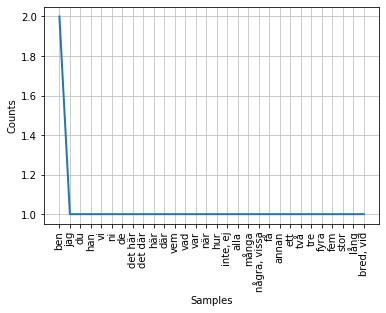

In [106]:
# Load Swahili corpus
swahili_corpus = swadesh.words('sw')

# Compute word frequency distribution
freq_dist = FreqDist(swahili_corpus)

# Plot word frequency distribution
freq_dist.plot(30, cumulative=False)

# Generate of word cloud

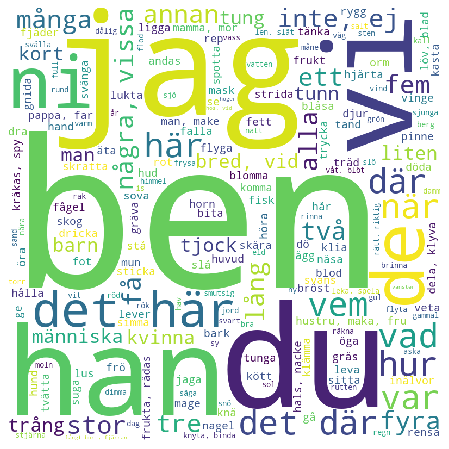

In [107]:
# Generate of word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Scatter plot of word frequency by source

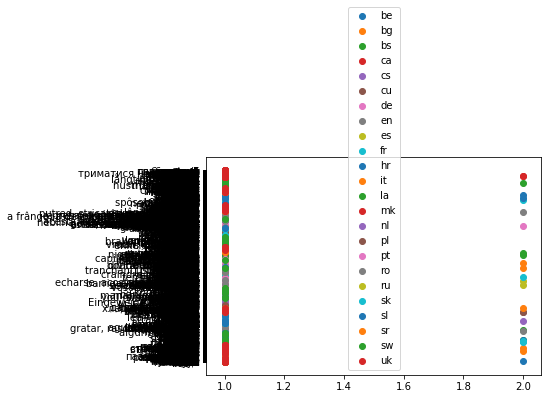

In [108]:
# Scatter plot of word frequency by source
sources = swadesh.fileids()
for source in sources:
    swahili_words = swadesh.words(source)
    freq_dist = FreqDist(swahili_words)
    x = [freq_dist[word] for word in freq_dist.keys()]
    y = [word for word in freq_dist.keys()]
    plt.scatter(x, y, label=source)
plt.legend()
plt.show()

In [111]:
# Load the corpus from file
with open('swahili_corpus.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()
    
# Define the order of the n-gram model
n = 3

# Define a function to build an n-gram language model from a list of words
def build_language_model(words, n):
    # Create a list of n-grams from the words
    ngrams = nltk.ngrams(words, n)
    # Calculate the frequency of each n-gram
    frequency = nltk.FreqDist(ngrams)
    # Calculate the conditional frequency of each word given the n-1 preceding words
    cfd = nltk.ConditionalFreqDist([(tuple(ngram[:-1]), ngram[-1]) for ngram in ngrams])
    # Calculate the probability distribution of each word given the n-1 preceding words
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

# Build an n-gram language model from the preprocessed corpus

In [112]:
# Build an n-gram language model from the preprocessed corpus
language_model = build_language_model(corpus_words, n)

# Test the language model by predicting the most likely correction for a misspelled word
misspelled_word = 'habarii'
context = ('nataka', 'kuja')
suggestions = []
for word in language_model[context].samples():
    suggestions.append(word)
print(f"Corrections for '{misspelled_word}' in context {context}: {suggestions}")

Corrections for 'habarii' in context ('nataka', 'kuja'): []


In [115]:
# Load the preprocessed corpus from file
with open('swahili_corpus.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()
    
# Tokenize the corpus into words
corpus_words = nltk.word_tokenize(corpus)

# Define the order of the n-gram model
n = 3

# Define a function to generate training data from the corpus
def generate_training_data(words, n):
    # Create a list of n-grams from the words
    ngrams = nltk.ngrams(words, n)
    # Create a list of input sequences and output sequences
    X = []
    y = []
    for ngram in ngrams:
        X.append(ngram[:-1])
        y.append(ngram[-1])
    return X, y

# Training data from the preprocessed corpus

In [116]:
# Generate training data from the preprocessed corpus
X, y = generate_training_data(corpus_words, n)

# Generate training data from the preprocessed corpus
X, y = generate_training_data(corpus_words, n)

# Define a function to train an n-gram language model using the input and output sequences
def train_language_model(X, y):
    # Calculate the frequency of each n-gram
    frequency = nltk.FreqDist(list(nltk.ngrams(X, n)))
    # Calculate the conditional frequency of each word given the n-1 preceding words
    cfd = nltk.ConditionalFreqDist(list(zip(X, y)))
    # Calculate the probability distribution of each word given the n-1 preceding words
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

In [117]:
# Train an n-gram language model on the training data
language_model = train_language_model(X, y)

# Test the language model by predicting the most likely correction for a misspelled word
misspelled_word = 'habarii'
context = ('nataka', 'kuja')
suggestions = []
for word in language_model[context].samples():
    suggestions.append(word)
print(f"Corrections for '{misspelled_word}' in context {context}: {suggestions}")

# Load the preprocessed corpus from file
with open('swahili_corpus.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()
    

# Tokenize the corpus into words
corpus_words = nltk.word_tokenize(corpus)

# Define the order of the n-gram model
n = 3

# Define a function to generate training data from the corpus
def generate_training_data(words, n):
    # Create a list of n-grams from the words
    ngrams = nltk.ngrams(words, n)
    # Create a list of input sequences and output sequences
    X = []
    y = []
    for ngram in ngrams:
        X.append(ngram[:-1])
        y.append(ngram[-1])
    return X, y

Corrections for 'habarii' in context ('nataka', 'kuja'): []


In [118]:
# Generate training data from the preprocessed corpus
X, y = generate_training_data(corpus_words, n)

# Define a function to train an n-gram language model using the input and output sequences
def train_language_model(X, y):
    # Calculate the frequency of each n-gram
    frequency = nltk.FreqDist(list(nltk.ngrams(X, n)))
    # Calculate the conditional frequency of each word given the n-1 preceding words
    cfd = nltk.ConditionalFreqDist(list(zip(X, y)))
    # Calculate the probability distribution of each word given the n-1 preceding words
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

In [119]:
# Train an n-gram language model on the training data
language_model = train_language_model(X, y)

# Define a function to correct a misspelled word in a given context
def correct_word(misspelled_word, context):
    # Get the list of suggestions for the misspelled word in the given context
    suggestions = []
    for word in language_model[context].samples():
        suggestions.append(word)
    # If there are no suggestions, return the original word
    if not suggestions:
        return misspelled_word
    # Otherwise, return the suggestion with the highest probability
    else:
        return max(suggestions, key=lambda x: language_model[context].prob(x))

# Test the auto-correct feature

In [120]:
# Test the auto-correct feature
misspelled_word = 'habarii'
context = ('nataka', 'kuja')
corrected_word = correct_word(misspelled_word, context)
print(f"Correction for '{misspelled_word}' in context {context}: {corrected_word}")

Correction for 'habarii' in context ('nataka', 'kuja'): habarii
